In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosistest

#### 1. Cargad el csv de listings

In [31]:
df = pd.read_csv('listings.csv', index_col= 0)
df.sample()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
5794,23317320,Habitación luminosa con baño privado y vistas,33857231,Laura,Chamartín,Castilla,40.48076,-3.67646,Private room,29,1,3,2020-01-26,0.12,1,17,0,NaN


#### 2. Eliminad las columnas latitude, longitude, last_review, license, name, host_id, neighbourhood, id y host_name ya que no serán útiles para nuestro propósito.

In [32]:
df = df.drop(['latitude', 'longitude', 'last_review', 'license', 'name', 'host_id', 'neighbourhood', 'id', 'host_name'], axis=1)

In [33]:
df.sample(3)

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
16810,Centro,Entire home/apt,91,3,5,2.78,45,331,5
3314,Centro,Entire home/apt,90,1,96,1.60,2,319,5
15639,Salamanca,Entire home/apt,108,2,10,2.19,8,52,10


#### 3. Explorad el dataset, para esto tendréis que usar métodos aprendidos hasta ahora, como el describe(), el info(), value_counts(), etc. También podréis hacer gráficas para empaparos mejor del dataset.
📌 NOTA En caso de que haya algún nulo gestionad esos valores como aprendimos en las lecciones de limpieza.

In [34]:
df.describe(include='all')

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,17606,17606,17606.000000,17606.000000,17606.000000,13593.000000,17606.000000,17606.000000,17606.000000
unique,21,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Centro,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8048,10688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,106.527150,7.449279,36.328184,1.347131,11.622856,148.076622,6.598035
std,NaN,NaN,130.223339,36.375985,68.979754,1.574951,27.842846,139.668538,13.367240
min,NaN,NaN,7.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,NaN,NaN,40.000000,1.000000,1.000000,0.240000,1.000000,0.000000,0.000000
50%,NaN,NaN,71.000000,2.000000,7.000000,0.810000,2.000000,104.000000,1.000000
75%,NaN,NaN,114.000000,3.000000,38.000000,1.940000,7.000000,308.000000,7.000000


<font color= 'pink'> ¿Cómo son nuestras columnas?

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17606 entries, 0 to 17830
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             17606 non-null  object 
 1   room_type                       17606 non-null  object 
 2   price                           17606 non-null  int64  
 3   minimum_nights                  17606 non-null  int64  
 4   number_of_reviews               17606 non-null  int64  
 5   reviews_per_month               13593 non-null  float64
 6   calculated_host_listings_count  17606 non-null  int64  
 7   availability_365                17606 non-null  int64  
 8   number_of_reviews_ltm           17606 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 1.3+ MB


In [36]:
df.columns

Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [37]:
df['neighbourhood_group'].value_counts()

Centro                   8048
Salamanca                1207
Chamberí                 1053
Arganzuela                972
Tetuán                    755
Carabanchel               610
Retiro                    607
Ciudad Lineal             523
Chamartín                 505
Moncloa - Aravaca         499
Latina                    482
Puente de Vallecas        477
San Blas - Canillejas     419
Hortaleza                 350
Fuencarral - El Pardo     271
Usera                     257
Villaverde                165
Barajas                   137
Moratalaz                 118
Villa de Vallecas          79
Vicálvaro                  72
Name: neighbourhood_group, dtype: int64

<font color='pink'> Vamos a ver cuántos nulos tenemos!

In [38]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

neighbourhood_group                0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 22.793366
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

In [39]:
df.isnull().sum()

neighbourhood_group                  0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 4013
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

<font color='pink'> Reemplazar los nulos por mediana ya que si observamos en el describe, la mediana y la media difieren mucho. Como sabemos que la media no es una medida de tendencia central robusta, utilizamos la mediana que sí que lo es.

In [40]:
df['reviews_per_month'].describe()

count    13593.000000
mean         1.347131
std          1.574951
min          0.010000
25%          0.240000
50%          0.810000
75%          1.940000
max         25.000000
Name: reviews_per_month, dtype: float64

In [41]:
df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace=True)

In [42]:
df.isnull().sum()

neighbourhood_group               0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

Text(0.5, 1.0, 'Nº de alquileres por barrio')

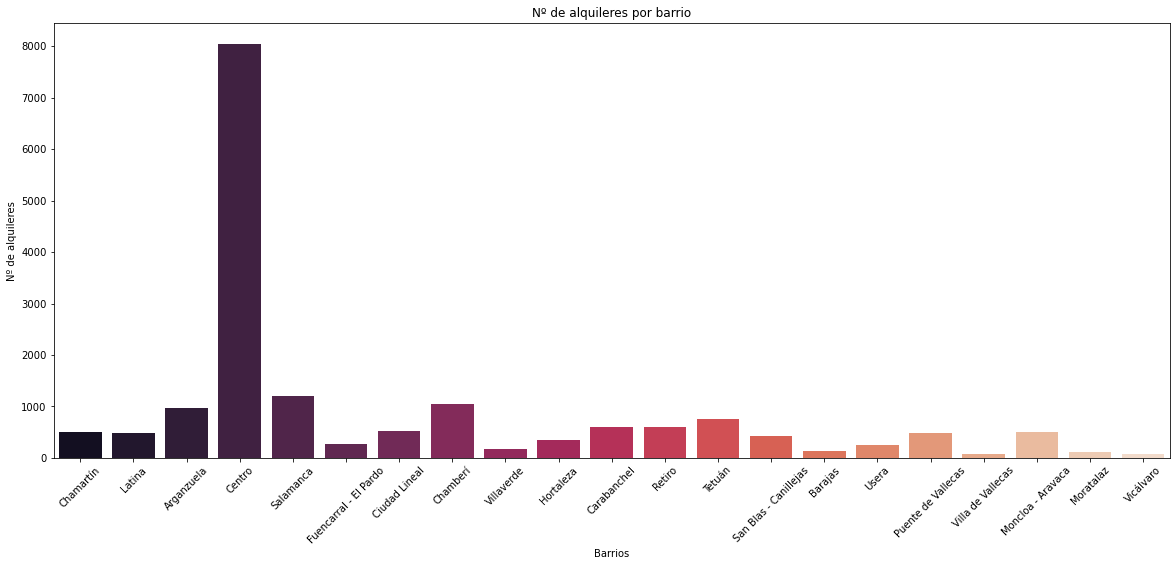

In [43]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=45)
sns.countplot(x="neighbourhood_group", data=df, palette="rocket");
plt.xlabel("Barrios")
plt.ylabel("Nº de alquileres")
plt.title("Nº de alquileres por barrio")

Text(0.5, 1.0, 'Nº de alquileres por precio')

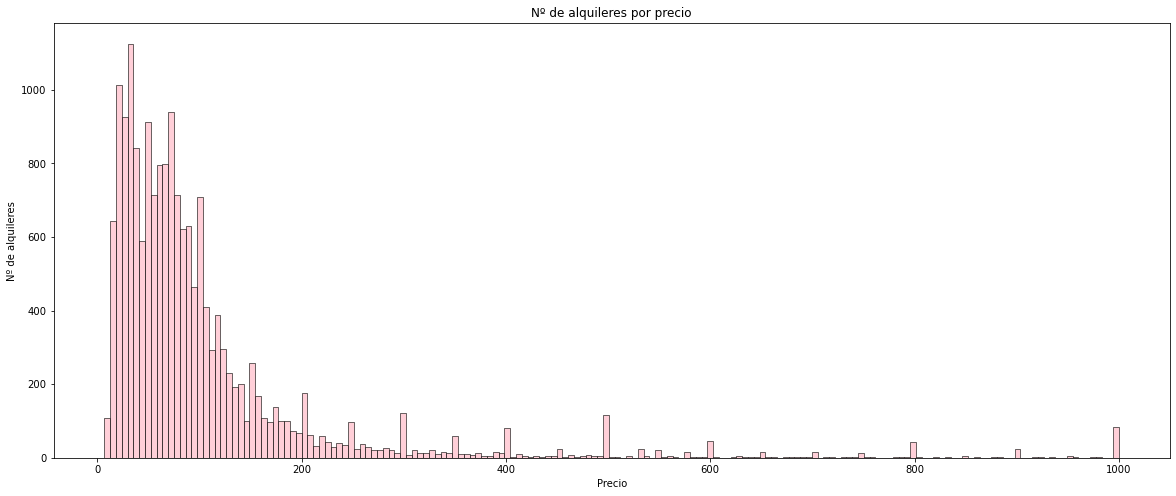

In [44]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=df, x="price", color = 'pink');
plt.xlabel("Precio")
plt.ylabel("Nº de alquileres")
plt.title("Nº de alquileres por precio")

#### 4. Definid cuáles son las variables predictoras y la variable respuesta. Debéis tener en cuenta que lo que vamos a querer saber es de que depende el precio de las casas.

 <font color ='pink'>
 
    -  variable respuesta : price = y

    -  variable predictora : room type, neighbourhood group

#### 5. Plantead una hipótesis alternativa. ¿Qué variables creeis que afectarán al precio de una casa?

<font color ='pink'>
- H0 = el precio NO depende del barrio


<font color = 'pink'> 
- H1 = el precio DEPENDE del barrio

<font color = 'pink'>  - - - - - - - - - - - - - - - - - - -

<font color='pink'> 
- H0 = el precio NO depende del tipo de habitaciones




<font color='pink'>- H1 = el precio DEPENDE del tipo de habitaciones

#### 6. Evaluad la normalidad de la variable respuesta. Hacedlo visualmente usando un histplot o un displot

Text(0.5, 1.0, 'Nº de alquileres por precio')

<Figure size 864x864 with 0 Axes>

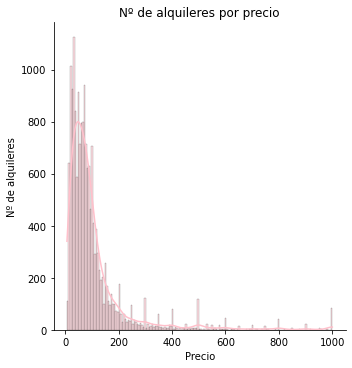

In [45]:
plt.figure(figsize=(12,12))
sns.displot(df['price'], kde = True, color = "pink", );
plt.xlabel("Precio")
plt.ylabel("Nº de alquileres")
plt.title("Nº de alquileres por precio")

<font color='pink'> Nuestra variable 'price' no tiene una distribución normal, es decir, que su representación gráfica no se asemeja a la campana de Gauss. Está sesgada hacia la izquierda.

#### 7. Evaluad la curtosis de las variables del dataset. ¿Qué tipo presenta cada variable?

In [46]:
df_num = df.select_dtypes(include = 'number')
df_num.head(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,59,1,81,0.57,1,149,3
1,31,4,33,0.38,2,131,0


In [49]:
for col in df_num.columns:
    print(f'La curtosidad de {col} es', kurtosistest(df_num[col]))

La curtosidad de price es KurtosistestResult(statistic=64.47166433148656, pvalue=0.0)
La curtosidad de minimum_nights es KurtosistestResult(statistic=92.63520739410924, pvalue=0.0)
La curtosidad de number_of_reviews es KurtosistestResult(statistic=61.516969011224326, pvalue=0.0)
La curtosidad de reviews_per_month es KurtosistestResult(statistic=66.06664100477293, pvalue=0.0)
La curtosidad de calculated_host_listings_count es KurtosistestResult(statistic=67.38410593803559, pvalue=0.0)
La curtosidad de availability_365 es KurtosistestResult(statistic=324.0690603833309, pvalue=0.0)
La curtosidad de number_of_reviews_ltm es KurtosistestResult(statistic=74.82995262621837, pvalue=0.0)


<font color='pink'> La curtosis es una medida que determina el grado de concentración que presentan los valores de una variable alrededor de la zona central de la distribución de frecuencias. 

<font color='pink'> En el resultado anterior podemos ver que todas las columnas, menos en una, tienen una curtosis mayor que 0, por lo que nuestros datos son de tipo leptocúrtico, es decir, la 'curva' de nuestra gráfica está muy afilada.

<font color='pink'> De aquí también podemos sacar que como el p-valor es menor que 0.05, rechazamos la hipótesis nula de que los datos están distribuidos normalmente. Así,confirmamos que nuestros datos no son normales.

#### 8. Como hemos eliminado algunas columnas, guardad el csv para seguir trabajando con el en los siguientes ejercicios de pair programming.

In [48]:
df.to_csv("listings_pair_1.csv")